In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
# 1. 读取Excel文件的第二个工作表（"数据"表）
scaler = StandardScaler()
df = pd.read_excel('orgian.xlsx', sheet_name=1)  # sheet_name=1表示第二个工作表
df

,账期,户均流量,流量单价,零流量用户数（出账）,出账用户数（出账）,流量收入
0,202106,44.48,0.8838,2438373,3383781,3.716533e+07
1,202107,72.85,0.4975,2452705,3522668,3.877854e+07
2,202108,48.09,0.7335,2487524,3621338,3.999417e+07
3,202109,47.83,0.6993,2523553,3715930,3.988205e+07
4,202110,65.71,0.4871,2591404,3886349,4.144775e+07
5,202111,46.13,0.6353,2581808,3998408,4.151543e+07
6,202112,59.92,0.4409,2445802,4037385,4.204760e+07
7,202201,82.30,0.3555,2479172,4008428,4.474244e+07
8,202202,69.82,0.4070,2518545,4099621,4.492903e+07
9,202203,96.05,0.2970,2488889,4161080,4.770234e+07


In [54]:
# 2. 数据预处理
# 确保账期是日期格式（假设账期格式为YYYYMM）
df['账期'] = pd.to_datetime(df['账期'], format='%Y%m')
df.set_index('账期', inplace=True)
df.sort_index(inplace=True)  # 确保按时间排序

In [55]:
# 3. 提取流量收入数据（黄色部分）
revenue = df['流量收入']
revenue

账期
2021-06-01    3.716533e+07
2021-07-01    3.877854e+07
2021-08-01    3.999417e+07
2021-09-01    3.988205e+07
2021-10-01    4.144775e+07
2021-11-01    4.151543e+07
2021-12-01    4.204760e+07
2022-01-01    4.474244e+07
2022-02-01    4.492903e+07
2022-03-01    4.770234e+07
2022-04-01    4.682974e+07
2022-05-01    4.864242e+07
2022-06-01    5.057496e+07
2022-07-01    5.302656e+07
2022-08-01    5.500364e+07
2022-09-01    5.636365e+07
2022-10-01    5.758039e+07
2022-11-01    5.897818e+07
2022-12-01    6.411024e+07
2023-01-01    6.743425e+07
2023-02-01    7.032734e+07
2023-03-01    7.526969e+07
2023-04-01    7.940701e+07
2023-05-01    8.689291e+07
2023-06-01    7.920991e+07
2023-07-01    8.190868e+07
2023-08-01    7.973485e+07
2023-09-01    7.732112e+07
2023-10-01    7.821680e+07
2023-11-01    8.409197e+07
2023-12-01    8.683596e+07
2024-01-01    8.915763e+07
2024-02-01    8.353072e+07
Name: 流量收入, dtype: float64

E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27969 (\N{CJK UNIFIED IDEOGRAPH-6D41}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site

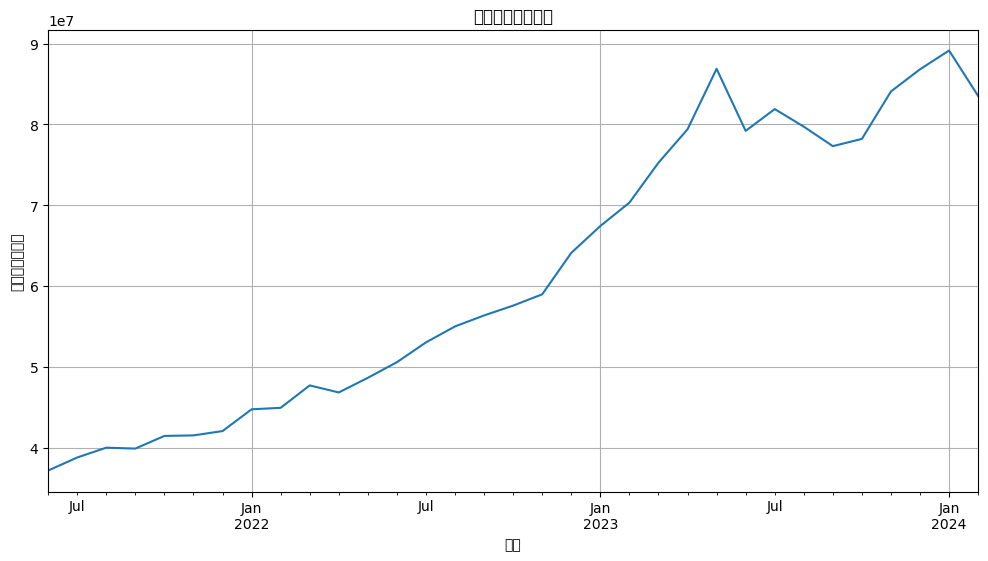

In [56]:
# 4. 可视化原始数据
plt.figure(figsize=(12, 6))
revenue.plot(title='流量收入时间序列', grid=True)
plt.ylabel('流量收入（元）')
plt.show()

E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36134 (\N{CJK UNIFIED IDEOGRAPH-8D26}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36134 (\N{CJK UNIFIED IDEOGRAPH-8D26}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


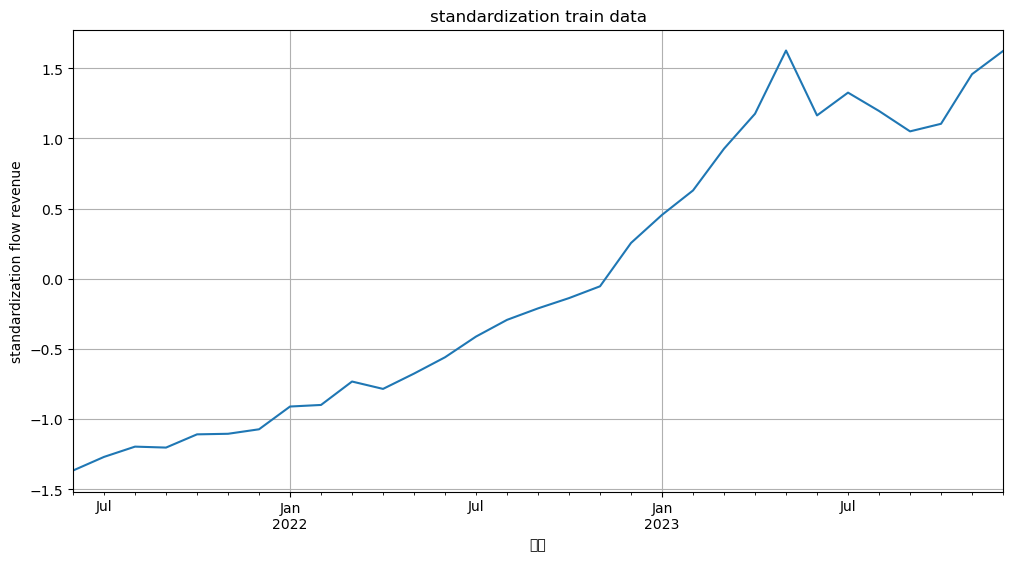

账期
2021-06-01   -1.366068
2021-07-01   -1.269006
2021-08-01   -1.195864
2021-09-01   -1.202610
2021-10-01   -1.108407
2021-11-01   -1.104334
2021-12-01   -1.072315
2022-01-01   -0.910174
2022-02-01   -0.898948
2022-03-01   -0.732085
2022-04-01   -0.784587
2022-05-01   -0.675523
2022-06-01   -0.559248
2022-07-01   -0.411741
2022-08-01   -0.292786
2022-09-01   -0.210958
2022-10-01   -0.137750
2022-11-01   -0.053648
2022-12-01    0.255133
2023-01-01    0.455130
2023-02-01    0.629199
2023-03-01    0.926567
2023-04-01    1.175498
2023-05-01    1.625904
2023-06-01    1.163639
2023-07-01    1.326017
2023-08-01    1.195223
2023-09-01    1.049996
2023-10-01    1.103887
2023-11-01    1.457379
2023-12-01    1.622478
dtype: float64

In [58]:
# 5. 划分训练集和测试集（使用2024年1-2月作为测试集）
train = revenue.loc[:'2023-12']
test = revenue.loc['2024-01':]
# 标准化后的建模流程
scaler = StandardScaler()
train_scaled_values = scaler.fit_transform(train.values.reshape(-1, 1)).flatten()
train_scaled=pd.Series(train_scaled_values,index=train.index)
plt.figure(figsize=(12,6))
train_scaled.plot(title='standardization train data',grid=True)
plt.ylabel('standardization flow revenue')
plt.show()
train_scaled

In [59]:
# 6. 建立SARIMA模型并拟合
# 参数说明：(p,d,q)为非季节性部分，(P,D,Q,s)为季节性部分
model = SARIMAX(train_scaled, 
                order=(1, 1, 1), 
                seasonal_order=(0, 1, 0, 12),
                enforce_stationarity=True,   # 强制AR多项式平稳
                enforce_invertibility=True)  # 强制MA多项式可逆)
results = model.fit()

E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
E:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [60]:
# 7. 模型诊断
print(results.summary())
results

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   31
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                   1.532
Date:                             Tue, 01 Jul 2025   AIC                              2.935
Time:                                     16:36:29   BIC                              5.606
Sample:                                 06-01-2021   HQIC                             3.304
                                      - 12-01-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5044      7.740      0.065      0.948     -14.666      15.675
ma.L1         -0.4664      

In [63]:
forecast = results.get_forecast(steps=12)
forecast_mean_scaled = forecast.predicted_mean
conf_int_scaled = forecast.conf_int()
forecast_mean = pd.Series(
    scaler.inverse_transform(forecast_mean_scaled.values.reshape(-1, 1)).flatten(),
    index=forecast_mean_scaled.index
)
forecast_mean

2024-01-01    9.012204e+07
2024-02-01    9.299598e+07
2024-03-01    9.792868e+07
2024-04-01    1.020611e+08
2024-05-01    1.095446e+08
2024-06-01    1.018603e+08
2024-07-01    1.045585e+08
2024-08-01    1.023843e+08
2024-09-01    9.997045e+07
2024-10-01    1.008661e+08
2024-11-01    1.067412e+08
2024-12-01    1.094852e+08
Freq: MS, dtype: float64

In [64]:

# 逆标准化预测结果

conf_int_lower = scaler.inverse_transform(conf_int_scaled.iloc[:, 0].values.reshape(-1, 1)).flatten()
conf_int_upper = scaler.inverse_transform(conf_int_scaled.iloc[:, 1].values.reshape(-1, 1)).flatten()


# 8. 预测2024年1-12月数据
#forecast_steps = 12
#forecast = results.get_forecast(steps=forecast_steps)
#forecast_mean = forecast.predicted_mean
#conf_int = forecast.conf_int()

In [65]:
# 9. 评估模型（在测试集上）
predictions_scaled = forecast_mean_scaled.loc['2024-01':'2024-02']
predictions = scaler.inverse_transform(predictions_scaled.values.reshape(-1, 1)).flatten()
mae = mean_absolute_error(test, predictions)
print(f"测试集MAE(平均绝对误差): {mae:.2f}")

测试集MAE(平均绝对误差): 5214831.01


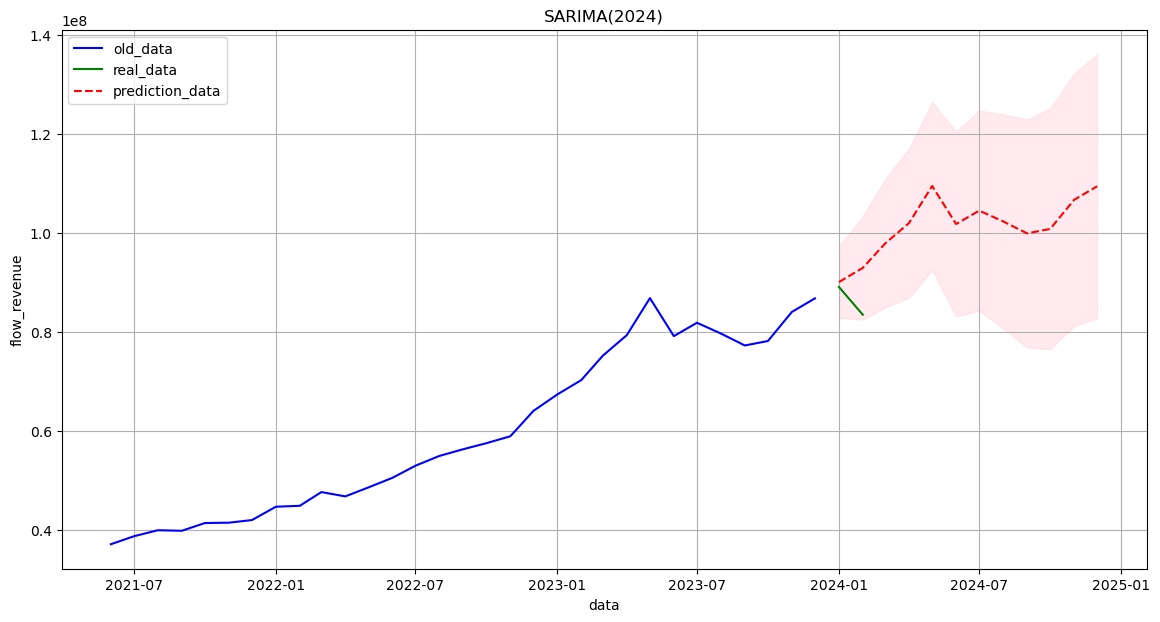

账期
2021-06-01    3.716533e+07
2021-07-01    3.877854e+07
2021-08-01    3.999417e+07
2021-09-01    3.988205e+07
2021-10-01    4.144775e+07
2021-11-01    4.151543e+07
2021-12-01    4.204760e+07
2022-01-01    4.474244e+07
2022-02-01    4.492903e+07
2022-03-01    4.770234e+07
2022-04-01    4.682974e+07
2022-05-01    4.864242e+07
2022-06-01    5.057496e+07
2022-07-01    5.302656e+07
2022-08-01    5.500364e+07
2022-09-01    5.636365e+07
2022-10-01    5.758039e+07
2022-11-01    5.897818e+07
2022-12-01    6.411024e+07
2023-01-01    6.743425e+07
2023-02-01    7.032734e+07
2023-03-01    7.526969e+07
2023-04-01    7.940701e+07
2023-05-01    8.689291e+07
2023-06-01    7.920991e+07
2023-07-01    8.190868e+07
2023-08-01    7.973485e+07
2023-09-01    7.732112e+07
2023-10-01    7.821680e+07
2023-11-01    8.409197e+07
2023-12-01    8.683596e+07
Name: 流量收入, dtype: float64
账期
2024-01-01    8.915763e+07
2024-02-01    8.353072e+07
Name: 流量收入, dtype: float64
2024-01-01    9.012204e+07
2024-02-01    9.299598

In [70]:
#10. 可视化预测结果
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='old_data', color='blue')
plt.plot(test.index, test, label='real_data', color='green')
plt.plot(forecast_mean.index, forecast_mean, label='prediction_data', color='red', linestyle='--')
plt.fill_between(forecast_mean.index,
                conf_int_lower,
                conf_int_upper, 
                color='pink', alpha=0.3)
plt.title('SARIMA(2024)')
plt.xlabel('data')
plt.ylabel('flow_revenue')
plt.legend()
plt.grid(True)
plt.show()
# # 10. 可视化（自动使用原始量纲）
# plt.figure(figsize=(14, 7))
# plt.plot(train.index, train, label='历史数据', color='blue')
# plt.plot(test.index, test, label='实际值', color='green')
# plt.plot(forecast_mean.index, forecast_mean, label='预测值', color='red', linestyle='--')
# plt.fill_between(forecast_mean.index,
#                 conf_int_lower,
#                 conf_int_upper, 
#                 color='pink', alpha=0.3)
# plt.title('流量收入预测 (逆标准化后)')
# plt.ylabel('流量收入（元）')  # 注意单位恢复
print(train)
print(test)
print(forecast_mean)

In [72]:
# 修改第11步输出（使用逆标准化后的数据）
forecast_df = pd.DataFrame({
    '预测日期': forecast_mean.index,
    '预测流量收入': forecast_mean.values,
    '下限(95%置信区间)': conf_int_lower,
    '上限(95%置信区间)': conf_int_upper
})
print("\n2024年流量收入预测结果:")
print(forecast_df.round(2))


2024年流量收入预测结果:
         预测日期        预测流量收入  下限(95%置信区间)   上限(95%置信区间)
0  2024-01-01  9.012204e+07  82883512.98  9.736056e+07
1  2024-02-01  9.299598e+07  82563078.04  1.034289e+08
2  2024-03-01  9.792868e+07  84990504.88  1.108668e+08
3  2024-04-01  1.020611e+08  86993893.14  1.171284e+08
4  2024-05-01  1.095446e+08  92597812.95  1.264913e+08
5  2024-06-01  1.018603e+08  83215229.91  1.205054e+08
6  2024-07-01  1.045585e+08  84353865.00  1.247631e+08
7  2024-08-01  1.023843e+08  80730614.69  1.240381e+08
8  2024-09-01  9.997045e+07  76957925.85  1.229830e+08
9  2024-10-01  1.008661e+08  76570229.55  1.251619e+08
10 2024-11-01  1.067412e+08  81226348.85  1.322560e+08
11 2024-12-01  1.094852e+08  82806866.61  1.361634e+08


In [73]:
forecast_mean

2024-01-01    9.012204e+07
2024-02-01    9.299598e+07
2024-03-01    9.792868e+07
2024-04-01    1.020611e+08
2024-05-01    1.095446e+08
2024-06-01    1.018603e+08
2024-07-01    1.045585e+08
2024-08-01    1.023843e+08
2024-09-01    9.997045e+07
2024-10-01    1.008661e+08
2024-11-01    1.067412e+08
2024-12-01    1.094852e+08
Freq: MS, dtype: float64